In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [44]:
from keras.datasets import mnist

In [45]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

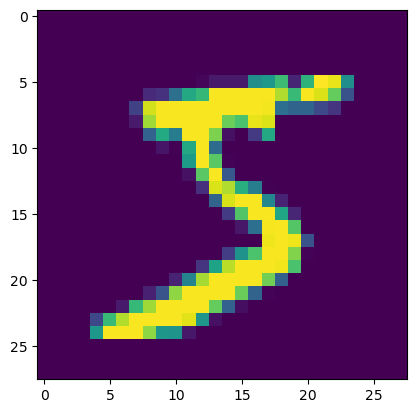

In [46]:

plt.imshow(x_train[0])

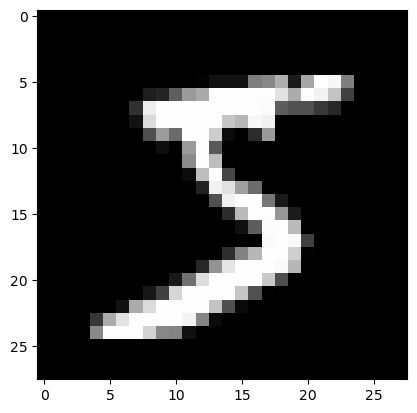

In [47]:
plt.imshow(x_train[0],cmap='gray')

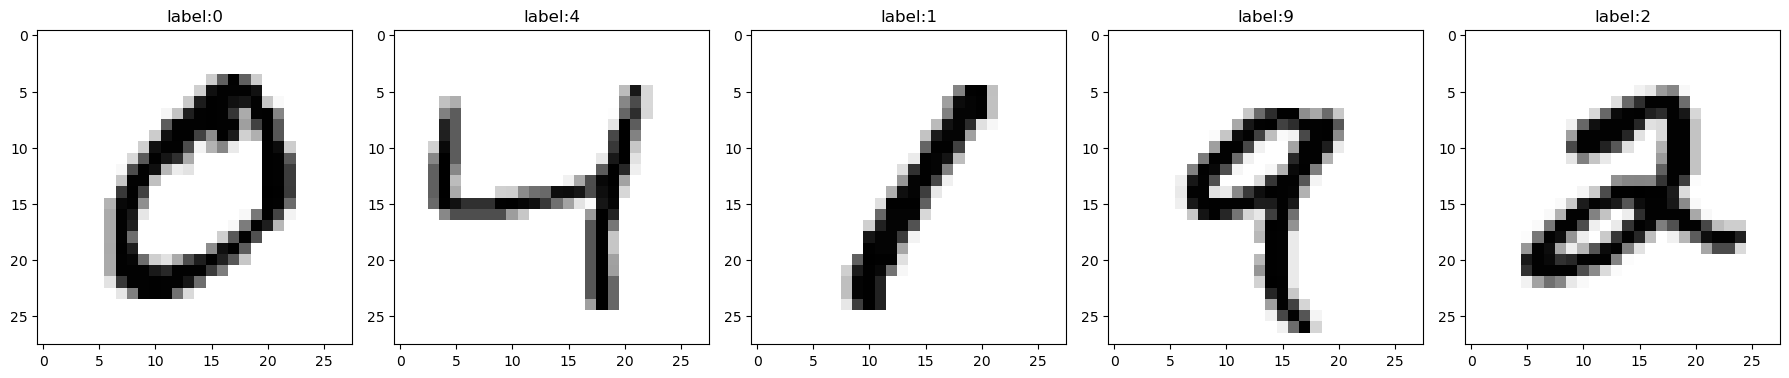

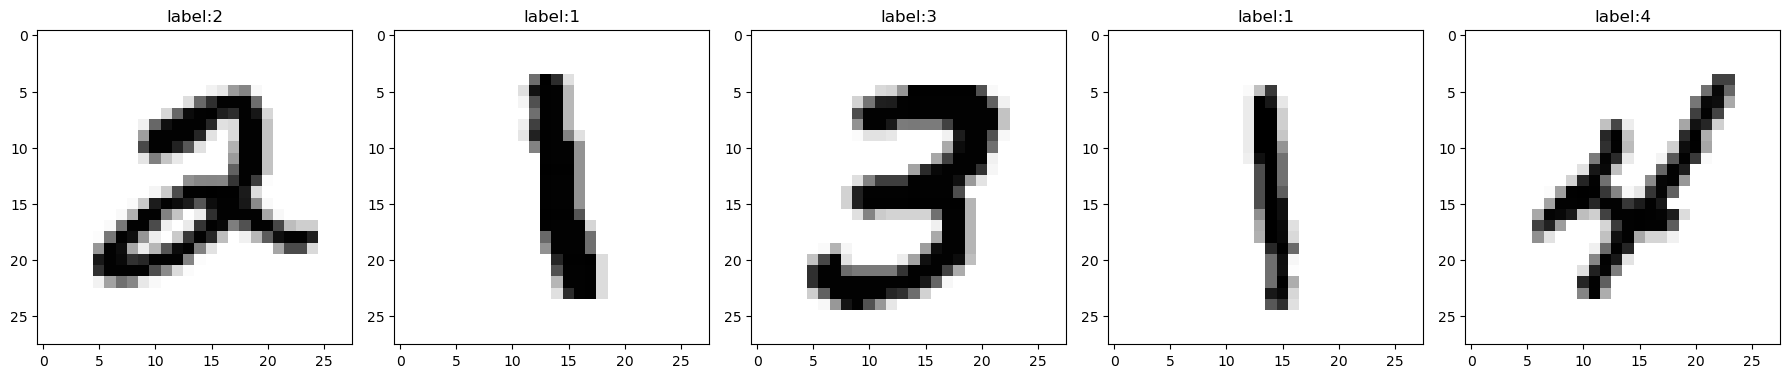

In [48]:
plt.figure(figsize=(18,9))
plt.subplot(2,1,1)
for i in range (0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i+1],cmap='gray_r')
    plt.title('label:'+format(y_train[i+1]))
    plt.tight_layout()
plt.show()

plt.figure(figsize=(18,9))
plt.subplot(2,1,2)
for i in range (0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[4+i+1],cmap='gray_r')
    plt.title('label:'+format(y_train[4+i+1]))
    plt.tight_layout()
plt.show()

In [49]:
from keras.models import Sequential

In [50]:
from keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from keras.optimizers import Adam

In [51]:
model=Sequential()


In [52]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [53]:
model.add(MaxPooling2D(2,2))

In [54]:
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))







model.add(Flatten())

In [55]:
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 32)        

In [57]:
x_train=x_train.reshape((60000,28,28,1))

x_test=x_test.reshape((10000,28,28,1))
x_train=x_train/255
x_test=x_test/255

In [58]:
x_train.shape

(60000, 28, 28, 1)

In [59]:
y_train.shape

(60000,)

In [60]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20)
loss,accu=model.evaluate(x_test,y_test)
print(accu)

Epoch 1/20
1875/1875 [==============================] - 61s 31ms/step - loss: 0.2512 - accuracy: 0.9211
Epoch 2/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0876 - accuracy: 0.9731
Epoch 3/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0689 - accuracy: 0.9794
Epoch 4/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0560 - accuracy: 0.9833
Epoch 5/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0486 - accuracy: 0.9857
Epoch 6/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0411 - accuracy: 0.9880
Epoch 7/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0348 - accuracy: 0.9897
Epoch 8/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0323 - accuracy: 0.9907
Epoch 9/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0292 - accuracy: 0.9910
Epoch 10/20
1875/1875 [==============================] - 32s 17m

In [61]:
model.save('mnist.h5')